In [1]:
#imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from astropy.io import ascii

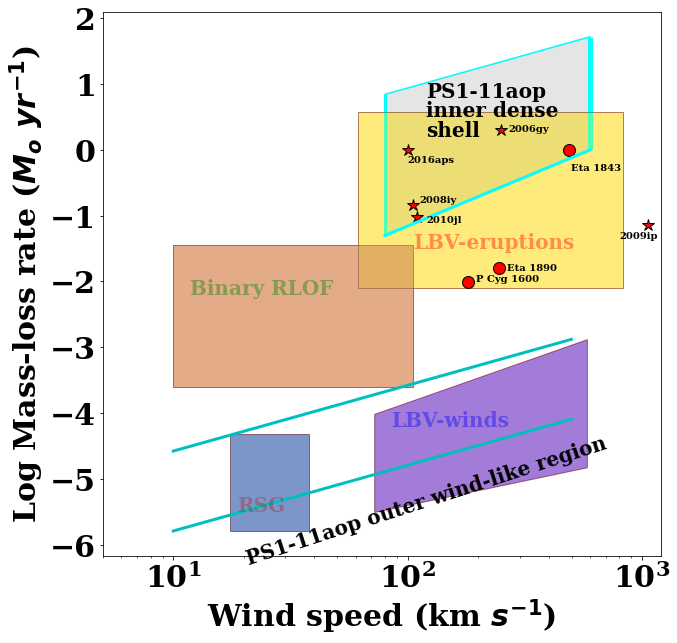

In [13]:
from matplotlib import pyplot as plt
from shapely.geometry.polygon import LinearRing, Polygon
import shapely.ops as so
from descartes import PolygonPatch

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 10})
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
from matplotlib import rc,rcParams
rc('font', weight='bold')

#RGB
ringa = Polygon([(17.40903215501481, -5.080859166627278),(17.40903215501481, -5.790022755356287),(17.40903215501481, -4.311667353153677),
                    (37.82892445901859, -4.311667353153677),(37.82892445901859, -5.311667353153677), 
                    (37.82892445901859, -5.790022755356287),
                    (17.40903215501481, -5.790022755356287)])

#LBV-Erup
ringb = Polygon([(61.373875968646395,0.5782696475958342),(831.3986484478344,0.5782696475958342),
                    (831.3986484478344,-2.0968014206904924),(61.373875968646395, -2.0968014206904924)])

#LBV-wind
ringc = Polygon([(72.31595912088636, -4.019426456984273),(583.9778143612374, -2.8841907668622584),
                    (583.9778143612374, -4.831360527222023),(72.31595912088636, -5.5098347704545)])

#binary
ringd = Polygon([(10.016805748499927, -1.440474823932962),(105.49898381873706,-1.440474823932962),
                    (105.49898381873706,-3.6038879923293523),(10.016805748499927,-3.6038879923293523)])

new_shape = so.cascaded_union([ringa, ringb, ringc, ringd])
fig, axs = plt.subplots(figsize=(10,10))
#axs.set_aspect('equal', 'datalim')
#for geom in new_shape.geoms: 
geom0 = new_shape.geoms[0]
xs, ys = geom0.exterior.xy    
axs.fill(xs, ys, alpha=0.3, fc='g', ec='red')

geom1 = new_shape.geoms[1]
xs, ys = geom1.exterior.xy    
axs.fill(xs, ys, alpha=0.3, fc='b', ec='red')

geom2 = new_shape.geoms[2]
xs, ys = geom2.exterior.xy    
axs.fill(xs, ys, alpha=0.3, fc='orange', ec='red')

poly1patch = PolygonPatch(ringa, fc='b', alpha=0.3, zorder=2)
poly2patch = PolygonPatch(ringb, fc='yellow', alpha=0.3, zorder=2)
poly3patch = PolygonPatch(ringc, fc='purple', alpha=0.3, zorder=2)
poly4patch = PolygonPatch(ringd, fc='brown', alpha=0.3, zorder=2)

axs.add_patch(poly1patch)
axs.add_patch(poly2patch)
axs.add_patch(poly3patch)
axs.add_patch(poly4patch)
#w = Mdot/wind-speed = 1e15 g/cm
wind = np.arange(-30,1000,10)
Mdot = (1e15*wind*1000)/6.307e+25 
#axs.plot(wind,np.log(Mdot))

#axs.plot([4.937991285358249,1594.3260212675523],[-4.304635761589404,-1.7880794701986753], color ='black',linestyle = '--')
#axs.plot([4.98621945778667,1363.0966210200456], [-3.3885209713024276, -0.9492273730684326],color ='black')

plt.text(105.45422633656347,-1.5002569505817180,'LBV-eruptions',color ='red', fontsize = 20, alpha = 0.4, fontweight ='bold')
plt.text(84.82227282331738,-4.1982569505817180,'LBV-winds',color ='blue', fontsize = 20, alpha = 0.4, fontweight ='bold')
plt.text(11.839166449719833,-2.2,'Binary RLOF',color ='green', fontsize = 20, alpha = 0.4, fontweight ='bold')
plt.text(18.735690893610602,-5.5,'RSG',color ='brown', fontsize = 20, alpha = 0.4, fontweight ='bold')

#sn

axs.plot(180.7460712792875, -2.0088300220750552,'or',markersize=12,markeredgecolor='k')
axs.text(194.7460712792875, -1.99900745272227132, 'P Cyg 1600')

axs.plot(246.1608787544737, -1.7991169977924946,'or',markersize=12,markeredgecolor='k')
axs.text(265.1608787544737,-1.83393649058713,'Eta 1890')

axs.plot(250.82797161935267, 0.3090507726269315,'*r',markersize=12,markeredgecolor='k')
axs.text(267.82797161935267,0.280242251732146, '2006gy')

axs.plot(488.7661077410801, 0,'or',markersize=12,markeredgecolor='k')
plt.text(495.7661077410801,-0.3155091992149392,'Eta 1843')

axs.plot(105.51190085042357, -0.8388520971302431,'*r',markersize=12,markeredgecolor='k')
axs.text(112.51190085042357,-0.7982569505817180, '2008iy')

axs.plot(109.39545127581218, -1.0264900662251657,'*r',markersize=12,markeredgecolor='k')
axs.text(120.39545127581218,-1.10204837664059,'2010jl')

axs.plot(1062.1964822293469, -1.1479028697571745,'*r',markersize=12,markeredgecolor='k')
axs.text(800.1964822293469,-1.350348652285743,'2009ip')

axs.plot(100, 0,'*r',markersize=12,markeredgecolor='k')
axs.text(100,-0.2,'2016aps')

#axs.text(500.41130325442,-1.00348652285743,r'$w = 5e16$ $(g/cm)$')
#axs.text(500.41130325442,-2.400008652285743,r'$w = 5e15$ $(g/cm)$')

#PS1-11aop
v = 100 #km/s

#radio combined
#plt.errorbar(v,np.log10(Mmean),yerr=np.log10(0.61551258699176),fmt='s',color='blue',markeredgecolor='r',ms=10,label='radio-mean')
#epoch 3
M3mean = 0.011672509891377063 #solar mass per year
#plt.plot(v,np.log10(M3mean),'s',color='blue',markeredgecolor='r',ms=5,label='radio-3-mean')

#epoch2
M2mean = 0.02041217515950739 #solar mass per year
#plt.plot(v,np.log10(M2mean),'v',color='blue',markeredgecolor='r',label='radio-2-mean')

#epoch1
M1mean = 0.043774237545776445 #solar mass per year
#plt.plot(v,np.log10(M1mean),'o',color='blue',markeredgecolor='r',label='radio-1-mean')

#optical CSM
R1 = (1e14+2.32e15)/2  #cm
d1 = ((5.49*10.**(-12))+(5.03E-13))/2  #gcm^-3
va = np.arange(80,600) #km/s
#va = np.arange(50,100) #km/s
Mcgs1 = d1*4*np.pi*R1**2*va*1e5
Mdcsm = Mcgs1/6.307e+25  #in solar mass per year

#optical CSM+Ni
R2 = (1e14+3.23e15)/2  #cm
d2 = ((2.57*10.**(-12))+(2.78E-13))/2  #gcm^-3
Mcgs2 = d2*4*np.pi*R2**2*va*1e5
Mdcsmni = Mcgs2/6.307e+25  #in solar mass per year


#Mdcsm = 8.741220099602362
plt.plot(va,np.log10(Mdcsm),color='cyan',label='CSM')
plt.plot(va,np.log10(Mdcsmni),color='none',label='CSMNi')

#X-ray
Md = [5e-2,1] #np.arange(1e-4,1) #solar mass per year
plt.plot([80,600],[np.log10(Md[0]),np.log10(Md[1])],color='cyan',markeredgecolor='k',lw=3,label='X-ray')

#shade the inner dense shell
plt.vlines(x = 80, ymin = min(np.log10(Md)), ymax = min(np.log10(Mdcsm)),colors = 'cyan',lw=3)
plt.vlines(x = 600, ymin = max(np.log10(Md)), ymax = max(np.log10(Mdcsm)),colors = 'cyan',lw=5)
plt.fill([80,600,600,80], [np.log10(5e-2),np.log10(1),max(np.log10(Mdcsm)),min(np.log10(Mdcsm))], 'gray', alpha=0.2, edgecolor='r')
plt.text(120,0.8,'PS1-11aop', fontsize = 20)
plt.text(120,0.5,'inner dense', fontsize = 20)
plt.text(120,0.2,'shell', fontsize = 20)

#Radio
#shade the windy outer region
vr = np.arange(10,500)  #wind speed
Mradmax =  26.450863693180743*1e-5 #2.4e-4 #26.450863 #2.4e-4
Mradmin = 1.6141202072445873*1e-5 #6.1e-5 #1.61412 #6.1e-5
Mmaxplot = Mradmax/100 
Mminplot = Mradmin/100
M2 = Mmaxplot*vr
M1 = Mminplot*vr
plt.plot(vr,np.log10(M2),color='c',lw=3)
plt.plot(vr,np.log10(M1),color='c',lw=3)
#plt.plot([10,500],[np.log10(Mradmax),np.log10(Mradmin)],color='r',linestyle=':')
#plt.plot([10,500],[np.log10(9.9e-5),np.log10(7e-5)],color='pink',linestyle=':')
#plt.plot([10,500],[np.log10(11.1e-5),np.log10(6.8e-5)],color='m',linestyle=':')
#plt.vlines(x = 100, ymin = np.log10(M2mean), ymax = np.log10(M1mean),colors = 'blue')
#plt.vlines(x = 300, ymin = np.log10(M2mean), ymax = np.log10(M1mean),colors = 'blue')

#fill([100,300,300,100], [np.log10(M1mean),np.log10(M1mean),np.log10(M2mean),np.log10(M2mean)], 'pink', alpha=0.2, edgecolor='r')
plt.text(20,-6.3,'PS1-11aop outer wind-like region', fontsize = 20, rotation =18)

#plt.legend(fontsize=15)
axs.set_xscale('log')
#axs.xaxis.set_ticks(np.arange(0, 1200))
axs.set_xlim(5,1200)
plt.xlabel(r'Wind speed (km $s^{-1}$)', fontsize = 30, fontweight='bold')
plt.ylabel(r'Log Mass-loss rate ($M_{o}$ $yr^{-1}$)',fontsize = 30,fontweight='bold')
plt.tick_params(labelsize = 30)
plt.savefig('nathan-smith.png',bbox_inches='tight',dpi = 500, transparent = True)
#plt.show()


In [75]:
mass_loss = 0.00016433774+9.323463863328872e-05+0.0001001310510083022
total_mass_probed_radio = ((mass_loss*6.307e+25)/(100*1e5))*(1e17-1e16)
total_mass_probed_radio
mass_sun_g = 1.989e33
total_mass_probed_radio/mass_sun_g

0.10208305569002325

In [76]:
mass_loss1 = (1e-16*4*np.pi*1e16**2*100*1e5)/6.307e+25 #in solar mass/yr
mass_loss1

0.01992448170978147

In [77]:
mass_loss2 = (1e-21*4*np.pi*1e17**2*100*1e5)/6.307e+25 #in solar mass/yr
mass_loss2

1.9924481709781467e-05

In [78]:
mass_loss = mass_loss1 + mass_loss2
total_mass_probed_radio = ((mass_loss*6.307e+25)/(100*1e5))*(1e17-1e16)
total_mass_probed_radio
mass_sun_g = 1.989e33
total_mass_probed_radio/mass_sun_g

5.691826690033273

In [3]:
from pylab import *

In [4]:
#BPT plot
from astropy.io import fits
from astropy.table import Table
event_filename = ('gal_line_dr7_v5_2.fit') 
hdu_list = fits.open(event_filename, memmap=True)
#hdu_list.info()
#print(hdu_list[1].columns)

FileNotFoundError: [Errno 2] No such file or directory: 'gal_line_dr7_v5_2.fit'

In [5]:
#print(hdu_list[1].columns)
data = Table(hdu_list[1].data)
oxyg=data['OIII_5007_FLUX']
oxyg_err=data['OIII_5007_FLUX_ERR']

Hbeta =data['H_BETA_FLUX']
Hbeta_err =data['H_BETA_FLUX_ERR']

nitro =data['NII_6584_FLUX']
nitro_err =data['NII_6584_FLUX_ERR']

Halpha =data['H_ALPHA_FLUX']
Halpha_err =data['H_ALPHA_FLUX_ERR']

#oxyg_c = oxyg[oxyg > (5*oxyg_err)] #length=320568
#Hbeta_c = Hbeta[Hbeta > (5*Hbeta_err)] 
#nitro_c = nitro[nitro > (5*nitro_err)]
#Halpha_c = Halpha[Halpha > (5*Halpha_err)]

NameError: name 'hdu_list' is not defined

In [5]:
#oxyg_c
#log([OIII]/Hβ) > 0.61/(log([NII]/Hα) − 0.05) + 1.3 ----> AGN #yaxis > (0.61/(xaxis-0.05))+1.3
#log([OIII]/Hβ) = 0.61/(log([NII]/Hα) - 0.47) + 1.19 ----> Starburst galaxies and composite

#yaxis = (0.61/(xaxis-0.47))+1.19

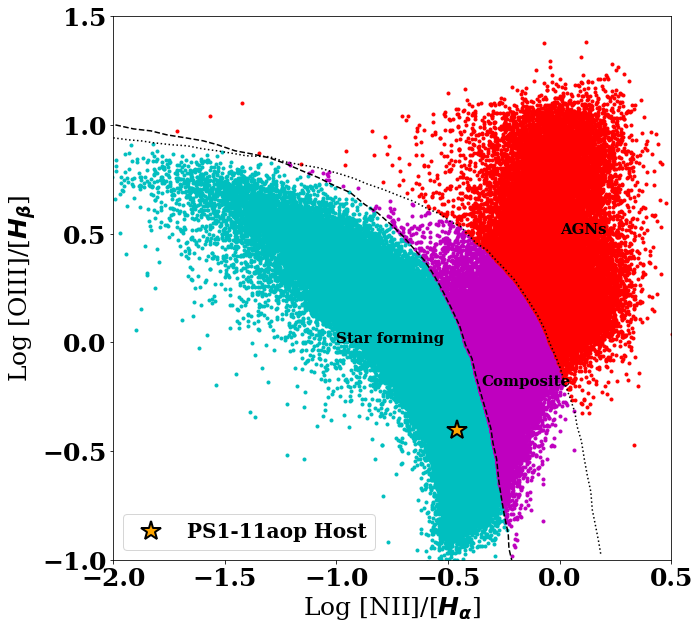

In [6]:

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 25})
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
fig = plt.subplots(figsize=(10,10))

#index1 = np.where((oxyg > (5*oxyg_err)) & (Hbeta > (5*Hbeta_err)) & (nitro > (5*nitro_err)) & (Halpha > (5*Halpha_err)) )
#yaxis = oxyg[index1]/Hbeta[index1]
#xaxis = nitro[index1]/Halpha[index1]
#index2 = np.where(yaxis > (0.61/(xaxis-0.05))+1.3) #>
#index3 = np.where(yaxis < (0.61/(xaxis-0.05))+1.3)  #<
#index4 = np.where(yaxis < (0.61/(xaxis-0.47))+1.19)  #<

####dashed line ####
dashed_x = [-1.9902597402597404,-1.9090909090909092,-1.8311688311688312,-1.7597402597402598,-1.6753246753246755,-1.5974025974025974,
            -1.5324675324675325,-1.3831168831168832,-1.301948051948052,-1.2272727272727273,-1.155844155844156,-1.0811688311688312,
            -1.0194805194805194,-0.9383116883116884,-0.8733766233766234,-0.8181818181818181,-0.7467532467532467,-0.7012987012987013,
            -0.6590909090909092,-0.6071428571428572,-0.5746753246753245,-0.5454545454545454,-0.5194805194805197,-0.4837662337662336,
            -0.44805194805194803,-0.4220779220779223,-0.3928571428571428,-0.3766233766233764,-0.3571428571428572,-0.331168831168831,
            -0.3084415584415585,-0.2987012987012987,-0.2824675324675323,-0.2727272727272725,-0.2597402597402598,-0.24675324675324672,
            -0.23051948051948035,-0.22727272727272707,-1.4545454545454546,-0.1]
                     
dashed_y = [1.0000000000000004, 0.981707317073171, 0.9725609756097564,0.9542682926829271, 0.9405487804878052, 0.9268292682926832,
            0.9085365853658539, 0.8673780487804881, 0.8490853658536588, 0.821646341463415, 0.7896341463414637, 0.7576219512195125,
            0.7256097560975613, 0.6890243902439027, 0.6341463414634149, 0.5975609756097564, 0.5335365853658538, 0.4878048780487807,
            0.4375000000000002, 0.3780487804878052, 0.3277439024390245, 0.27743902439024404, 0.22713414634146356, 0.15396341463414664,
            0.07621951219512213, -0.010670731707316916, -0.0746951219512193, -0.14786585365853644, -0.22103658536585358, -0.3124999999999998,
            -0.39481707317073145, -0.46341463414634143, -0.5365853658536586, -0.6371951219512195, -0.7240853658536586, -0.8018292682926829,
            -0.8795731707317072, -0.9481707317073171, 0.8810975609756101,-1.5]
#sorting the dashed lines
zipped_lists = zip(dashed_x, dashed_y)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
dashed_x,dashed_y = [ list(tuple) for tuple in  tuples]

###### dotted line ######
file_in1 = 'bpt_plot_data.csv'
data_plot1 = ascii.read(file_in1)
dotted_x = data_plot1['col1']
dotted_y = data_plot1['col2']
#sorting the dotted lines
zipped_lists = zip(dotted_x, dotted_y)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
dotted_x,dotted_y = [ list(tuple) for tuple in  tuples]

#plt.plot(np.log10(xaxis), np.log10(yaxis),'.', color = 'blue')
'''
#sections = []
for i in range(len(xaxis)):
    y_line = np.interp(np.log10(xaxis[i]),dashed_x,dashed_y)
    ya_line = np.interp(np.log10(xaxis[i]),dotted_x,dotted_y)
    
   
    if np.log10(yaxis[i])<y_line:
        plt.plot(np.log10(xaxis[i]),np.log10(yaxis[i]), color = 'c')
        #sections.append('section1')
        
    elif ((np.log10(yaxis[i]) < ya_line) and (np.log10(yaxis[i]) > y_line)):
        #sections.append('section2')
        plt.plot(np.log10(xaxis[i]),np.log10(yaxis[i]), color = 'm')
    else:
        plt.plot(np.log10(xaxis[i]),np.log10(yaxis[i]), color = 'r')
        #sections.append('section3')
       
### write out the file once ####

#data = [np.log10(xaxis),np.log10(yaxis),sections]
#file_out = 'sections.csv'
#names = ['logxaxis','logyaxis','sections']
#ascii.write(data,file_out,names=names,overwrite=True,format='csv')
'''
file_ina = 'sections.csv'
dataplota = ascii.read(file_ina)
logxaxis = dataplota['logxaxis'] 
logyaxis = dataplota['logyaxis'] 
sec = dataplota['sections'] 

indexa = np.where(dataplota['sections'] == 'section1')[0]
data_plota = dataplota[indexa]
plt.plot(data_plota['logxaxis'],data_plota['logyaxis'],'.', color = 'c')

indexb = np.where(dataplota['sections'] == 'section2')[0]
data_plotb = dataplota[indexb]
plt.plot(data_plotb['logxaxis'],data_plotb['logyaxis'],'.', color = 'm')

indexc = np.where(dataplota['sections'] == 'section3')[0]
data_plotc = dataplota[indexc]
plt.plot(data_plotc['logxaxis'],data_plotc['logyaxis'],'.', color = 'r')

'''
for i in sec:
    if sec == section1:
        plt.plot(logxaxis[i],logyaxis[i], color = 'c')
    elif sec == section2:
        plt.plot(logxaxis[i],logyaxis[i], color = 'm')
    else:
        plt.plot(logxaxis[i],logyaxis[i], color = 'r')
'''      

#plotting the dashed lines
plt.plot(dashed_x, dashed_y,'--', color ='black')
plt.plot(dotted_x, dotted_y,':', color ='black')

######Actual data for PS1-11aop host#####
#Log10 ( [OIII]λ5007/Hβ ) =  -0.4024
#Log10 ([NII]λ6584/Hα ) = -0.4584 
plt.plot(-0.4584,-0.4024,'*', color = 'orange',markersize=20,markeredgecolor='k',markeredgewidth=2,label='PS1-11aop Host')

plt.xlabel(r'Log [NII]/[$H_{\alpha}$]',fontsize = 25)
plt.ylabel(r'Log [OIII]/[$H_{\beta}$]',fontsize = 25)
plt.xlim(-2,0.5)
plt.ylim(-1,1.5)
plt.text(-1,0,'Star forming',fontsize = 15, color='k')
plt.text(-0.35,-0.2,'Composite',fontsize = 15, color='k')
plt.text(0,0.5,'AGNs',fontsize = 15, color='k')
plt.legend(fontsize = 20)
#plt.show()
#plt.savefig('BPT.png',bbox_inches='tight',dpi = 500, transparent = True)

-3.7850862812 0.08689781320000001 -1.5558199824 1.1437396344
-1.3422998119 0.19105963490000002 -1.1616608976 1.0065301536
-2.7347449304 0.8612307544 -0.7472859498 2.5513303158


<ipython-input-9-364a08cc9606>:110: UserWarning: The following kwargs were not used by contour: 's', 'edgecolor'
  cfset1 = ax.contourf(xx1, yy1, f1,levels1, s=20, edgecolor='',cmap=cmap1,alpha=0.5)
<ipython-input-9-364a08cc9606>:117: UserWarning: The following kwargs were not used by contour: 's', 'edgecolor'
  cfset2 = ax.contourf(xx2, yy2, f2,levels2, s=20, edgecolor='',cmap=cmap2,alpha=0.5)
<ipython-input-9-364a08cc9606>:124: UserWarning: The following kwargs were not used by contour: 's', 'edgecolor'
  cfset3 = ax.contourf(xx3, yy3, f3,levels3, s=20, edgecolor='',cmap=cmap3,alpha=0.5)


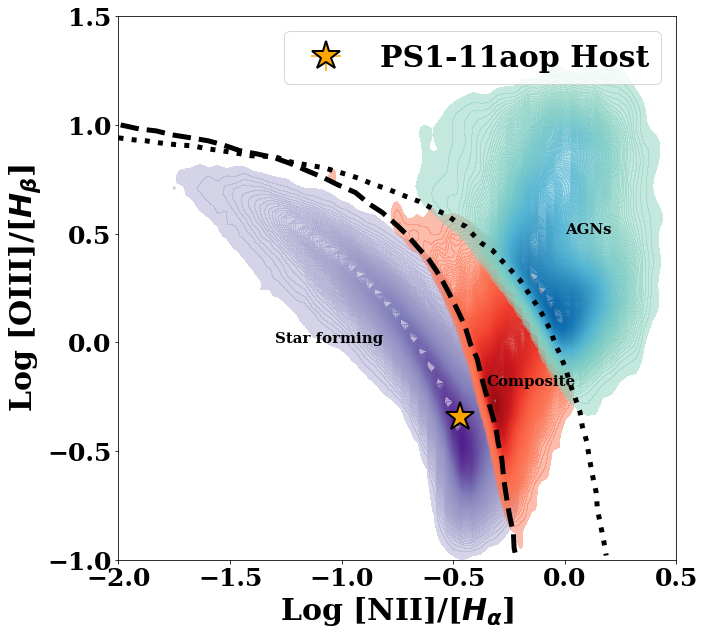

In [9]:
import matplotlib.colors as mcolors
import math
from scipy.stats import gaussian_kde
import matplotlib.colors as colors

######Actual data for PS1-11aop host#####
#nii = 372.2690*1e-17
#oiii = 251.3700 *1e-17
#hb = 99.047*1e-17 
#hacor=1.0479113790776249e-13

#ha = 769.869*1e-17 
from matplotlib import rc,rcParams
rc('font', weight='bold')

# This is to take the very white and very black parts of the default matplotlib colormaps off
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

file_ina = 'sections.csv'
dataplot = ascii.read(file_ina)
logxaxis = dataplot['logxaxis'] 
logyaxis = dataplot['logyaxis'] 
sec = dataplot['sections'] 

indexa = np.where(dataplot['sections'] == 'section1')[0]
data_plota = dataplot[indexa]

indexb = np.where(dataplot['sections'] == 'section2')[0]
data_plotb = dataplot[indexb]

indexc = np.where(dataplot['sections'] == 'section3')[0]
data_plotc = dataplot[indexc]

# Extract x1 and y1
x1 = data_plota['logxaxis']
y1 = data_plota['logyaxis']
# Define the borders
deltaX1 = (max(x1) - min(x1))/10
deltaY1 = (max(y1) - min(y1))/10
xmin1 = min(x1) - deltaX1
xmax1 = max(x1) + deltaX1
ymin1 = min(y1) - deltaY1
ymax1 = max(y1) + deltaY1
print(xmin1, xmax1, ymin1, ymax1)
# Create meshgrid
xx1, yy1 = np.mgrid[xmin1:xmax1:100j, ymin1:ymax1:100j]
#fit a gaussian
positions1 = np.vstack([xx1.ravel(), yy1.ravel()])
values1 = np.vstack([x1, y1])
kernel1 = gaussian_kde(values1)
f1 = np.reshape(kernel1(positions1).T, xx1.shape)


# Extract x2 and y2
x2 = data_plotb['logxaxis']
y2 = data_plotb['logyaxis']
# Define the borders
deltaX2 = (max(x2) - min(x2))/10
deltaY2 = (max(y2) - min(y2))/10
xmin2 = min(x2) - deltaX2
xmax2 = max(x2) + deltaX2
ymin2 = min(y2) - deltaY2
ymax2 = max(y2) + deltaY2
print(xmin2, xmax2, ymin2, ymax2)
# Create meshgrid
xx2, yy2 = np.mgrid[xmin2:xmax2:100j, ymin2:ymax2:100j]
#fit a gaussian
positions2 = np.vstack([xx2.ravel(), yy2.ravel()])
values2 = np.vstack([x2, y2])
kernel2 = gaussian_kde(values2)
f2 = np.reshape(kernel2(positions2).T, xx2.shape)


# Extract x3 and y3
x3 = data_plotc['logxaxis']
y3 = data_plotc['logyaxis']
# Define the borders
deltaX3 = (max(x3) - min(x3))/10
deltaY3 = (max(y3) - min(y3))/10
xmin3 = min(x3) - deltaX3
xmax3 = max(x3) + deltaX3
ymin3 = min(y3) - deltaY3
ymax3 = max(y3) + deltaY3
print(xmin3, xmax3, ymin3, ymax3)
# Create meshgrid
xx3, yy3 = np.mgrid[xmin3:xmax3:100j, ymin3:ymax3:100j]
#fit a gaussian
positions3 = np.vstack([xx3.ravel(), yy3.ravel()])
values3 = np.vstack([x3, y3])
kernel3 = gaussian_kde(values3)
f3 = np.reshape(kernel3(positions3).T, xx3.shape)


idx3 = f3.argsort()
idx2 = f2.argsort()
idx1 = f1.argsort()

#plot 1
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
#cfset1 = ax.contourf(xx1, yy1, f1, cmap='Purples')
step = 0.02
cmap1=truncate_colormap(plt.get_cmap('Purples'), 0.45, 0.9)
m1 = np.amax(f1)
levels1 = np.arange(0.0, m1, step) + step
cfset1 = ax.contourf(xx1, yy1, f1,levels1, s=20, edgecolor='',cmap=cmap1,alpha=0.5)
#cset1 = ax.contour(xx1, yy1, f1, colors='k',)

#cfset2 = ax.contourf(xx2, yy2, f2, cmap='Reds')
cmap2=truncate_colormap(plt.get_cmap('Reds'), 0.45, 0.9)
m2 = np.amax(f2)
levels2 = np.arange(0.0, m2, step) + step
cfset2 = ax.contourf(xx2, yy2, f2,levels2, s=20, edgecolor='',cmap=cmap2,alpha=0.5)
#cset2 = ax.contour(xx2, yy2, f2, colors='k')

#cfset3 = ax.contourf(xx3, yy3, f3, cmap='GnBu')
cmap3=truncate_colormap(plt.get_cmap('GnBu'), 0.45, 0.9)
m3 = np.amax(f3)
levels3 = np.arange(0.0, m3, step) + step
cfset3 = ax.contourf(xx3, yy3, f3,levels3, s=20, edgecolor='',cmap=cmap3,alpha=0.5)
#cset3 = ax.contour(xx3, yy3, f3, colors='k')

#ax.set_xlim(xmin, xmax)
#ax.set_ylim(ymin, ymax)

#PS1-11aop
plt.errorbar(np.log10(0.3376343278605599), np.log10(0.45298388361492015),xerr=0.004439310323390895,yerr= 0.006911607148913092,fmt='*', color = 'orange',markersize=30,markeredgecolor='k',markeredgewidth=2,label='PS1-11aop Host')

#### dashed and dotted lines #####
plt.plot(dashed_x, dashed_y,'--', color ='black',lw=5)
plt.plot(dotted_x, dotted_y,':', color ='black',lw=5)

plt.text(-1.3,0,'Star forming',fontsize = 15, color='k')
plt.text(-0.35,-0.2,'Composite',fontsize = 15, color='k')
plt.text(0,0.5,'AGNs',fontsize = 15, color='k')

plt.xlim(-2,0.5)
plt.ylim(-1,1.5)
#cset = ax.contour(xx, yy, f, colors='k')
ax.set_xlabel(r'Log [NII]/[$H_{\alpha}$]',fontsize = 30, fontweight='bold')
ax.set_ylabel(r'Log [OIII]/[$H_{\beta}$]',fontsize = 30, fontweight='bold')
plt.legend(fontsize=30)
plt.savefig('BPT.png',bbox_inches='tight',dpi = 300, transparent = True)

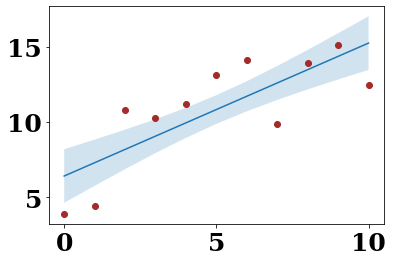

In [9]:
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='brown')